<a href="https://colab.research.google.com/github/MuhammadHassan667410/160-Days-of-learning-complete-AI/blob/main/Phase%202%20%3A%20Machine%20Learning%2C(Day%2020%20to%2050)/Day%201%20to%2033%20project/Customer_Segmentation_%2B_Spending_Behavior_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import necessary libaries and dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, silhouette_score


In [ ]:
df = pd.read_csv('Mall_Customers (1).csv')
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


###  Data Preprocessing

In [ ]:
# Drop ID column
df.drop('CustomerID', axis=1, inplace=True)

# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Check for nulls
print(df.isnull().sum())


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


###  Exploratory Data Analysis

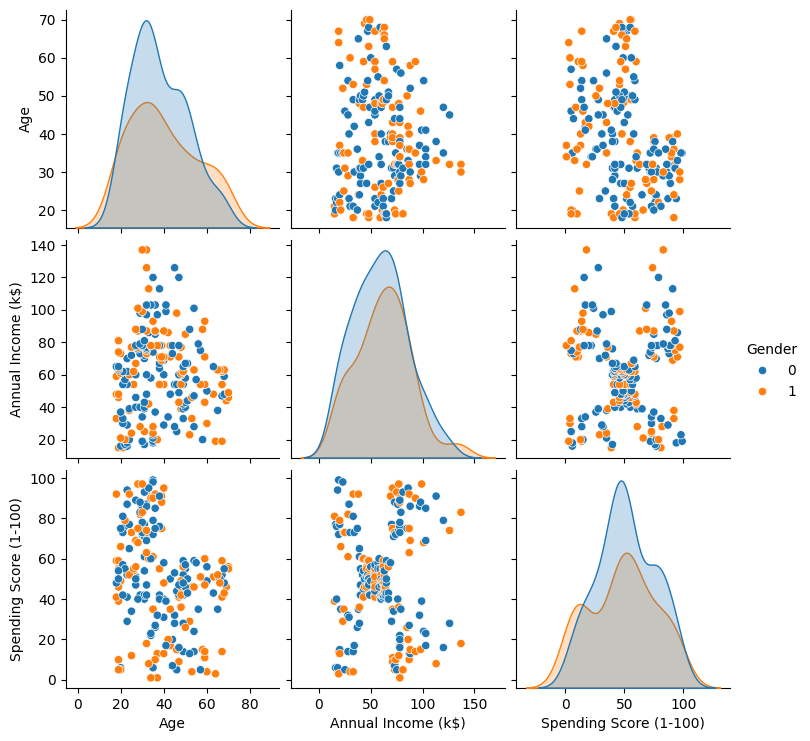

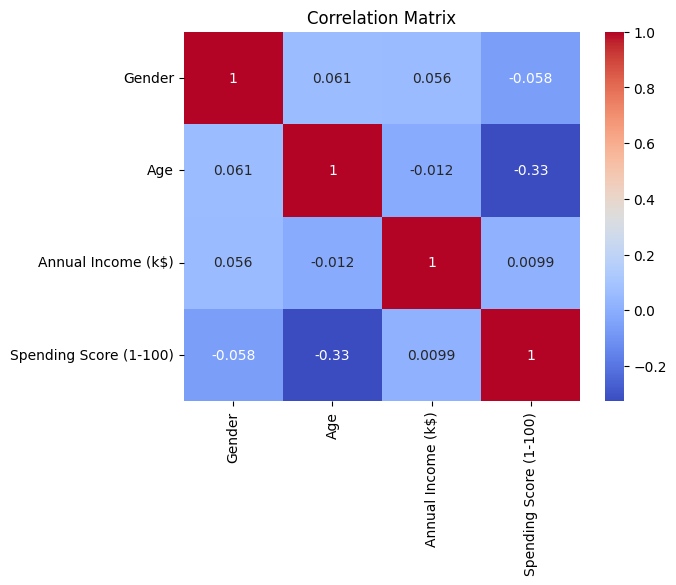

In [ ]:
sns.pairplot(df, hue='Gender')
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


### Feature Engineering

In [ ]:
df['HighSpender'] = df['Spending Score (1-100)'].apply(lambda x: 1 if x > 60 else 0)


### Feature Scaling


In [ ]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X_scaled = StandardScaler().fit_transform(df[features])


### PCA for Dimensionality Reduction

Explained Variance Ratio: [0.44266167 0.33308378]


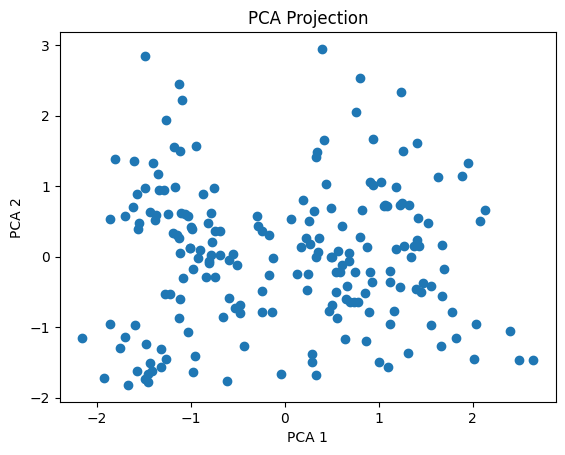

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection')
plt.show()


### KMeans Clustering

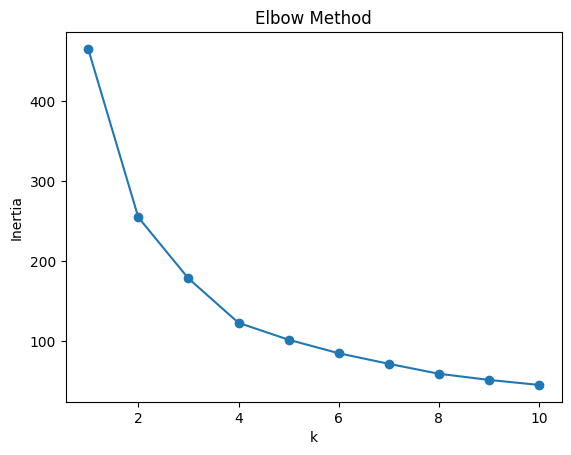

In [ ]:
# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


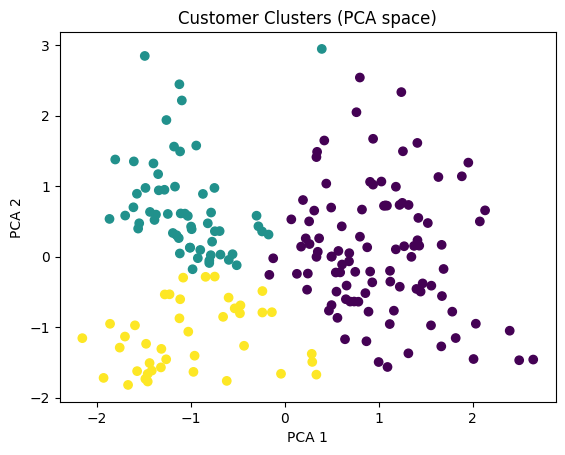

Silhouette Score: 0.424


In [ ]:
# Fit KMeans with optimal k
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)
df['Cluster'] = clusters

# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Customer Clusters (PCA space)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Silhouette score
score = silhouette_score(X_pca, clusters)
print(f"Silhouette Score: {score:.3f}")


### DBSCAN Clustering

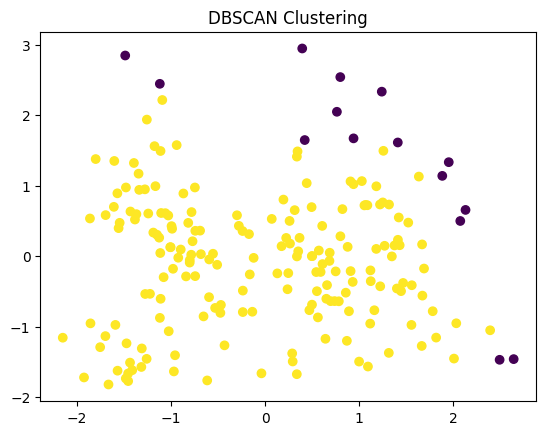

In [ ]:
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title("DBSCAN Clustering")
plt.show()


### Classification (Supervised Learning)

In [ ]:
X_class = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y_class = df['HighSpender']

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


### Evaluation

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00         8

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



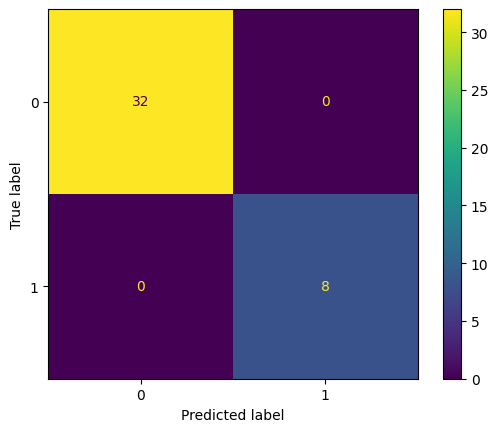

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()


### Feature

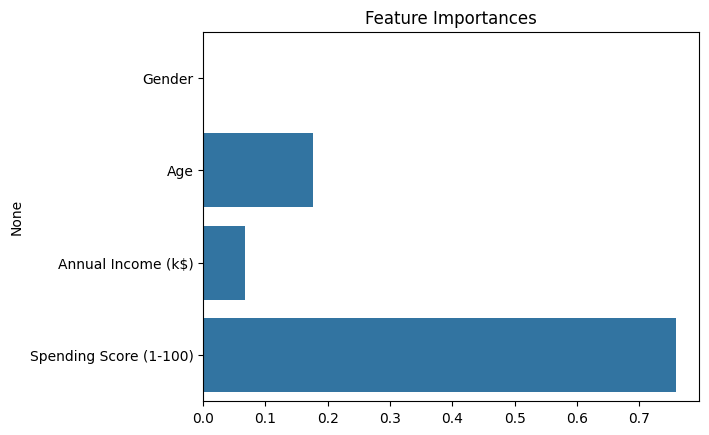

In [ ]:
importances = model.feature_importances_
feat_names = X_class.columns

sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances")
plt.show()
